In [21]:
from operator import concat
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

data = pd.read_csv('./car_price.csv')
# 展示数据
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [22]:
car_info = data[['car_ID' , 'CarName']]
# 保存车名和id 
car_info.head()

,car_ID,CarName
0,1,alfa-romero giulia
1,2,alfa-romero stelvio
2,3,alfa-romero Quadrifoglio
3,4,audi 100 ls
4,5,audi 100ls


In [23]:
# 对结果无影响，删除车名和id
data = data.drop(['car_ID','CarName'] , axis=1)
# 将数值型和字符串分开
# 将数值型特征按比例缩放的一定范围内

In [24]:
data_str = data.select_dtypes(include=object)
data_num = data.select_dtypes(exclude=object)

# 标准化标签
data_str = data_str.apply(LabelEncoder().fit_transform)
# 合并标准化的数据
train_x = pd.concat((data_str , data_num) , axis=1)
# 归一化到[0,1]
train_x = preprocessing.MinMaxScaler().fit_transform(train_x)
train_x

array([[1.        , 0.        , 1.        , ..., 0.22222222, 0.28947368,
        0.20795889],
       [1.        , 0.        , 1.        , ..., 0.22222222, 0.28947368,
        0.28255797],
       [1.        , 0.        , 1.        , ..., 0.16666667, 0.26315789,
        0.28255797],
       ...,
       [1.        , 0.        , 0.        , ..., 0.13888889, 0.18421053,
        0.40631051],
       [0.        , 1.        , 0.        , ..., 0.36111111, 0.28947368,
        0.43076312],
       [1.        , 1.        , 0.        , ..., 0.16666667, 0.23684211,
        0.43461099]])

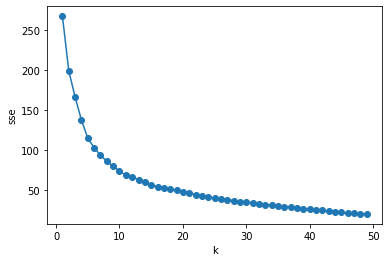

In [25]:
# 寻找k值,用手肘法计算不同k取值的误差平方和(sse)
sse = []
n = 50
for k in range(1,n):
    kmeans = KMeans(n_clusters=k) #n_clusters聚类数
    kmeans.fit(train_x) #喂数拟合
    sse.append(kmeans.inertia_) #计算簇内sse
    
x = range(1,n)
plt.xlabel('k')
plt.ylabel('sse')
plt.plot(x,sse,'o-') #todo
plt.show() 

In [26]:
# 使用手肘法确定k值后，开始聚类分析
kmeans = KMeans(n_clusters = 8)
kmeans.fit(train_x)
labels = kmeans.predict(train_x) # 按照已存在的质心对所以数据进行聚类
labels

array([0, 0, 0, 1, 1, 0, 4, 4, 2, 6, 0, 4, 0, 4, 4, 4, 0, 4, 3, 3, 1, 3,
       3, 6, 1, 1, 1, 6, 1, 6, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 1, 1, 3, 1,
       3, 1, 0, 4, 4, 0, 3, 3, 3, 1, 1, 0, 0, 0, 0, 3, 1, 3, 1, 7, 1, 4,
       7, 5, 5, 5, 5, 4, 0, 4, 0, 6, 3, 3, 3, 6, 6, 3, 6, 6, 6, 1, 1, 2,
       1, 3, 7, 3, 1, 1, 3, 3, 1, 1, 3, 1, 1, 4, 4, 4, 0, 6, 0, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 2, 3, 6, 1, 1, 1, 1, 6, 0, 0, 0, 0, 0, 1, 0,
       0, 4, 0, 4, 6, 2, 3, 3, 3, 1, 1, 1, 1, 2, 1, 1, 1, 2, 3, 3, 1, 1,
       1, 1, 1, 1, 7, 7, 1, 1, 1, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 5, 1,
       1, 1, 0, 0, 4, 4, 7, 3, 7, 1, 1, 7, 1, 0, 0, 4, 7, 1, 4, 4, 4, 4,
       2, 2, 4, 2, 4, 5, 2], dtype=int32)

In [27]:
# 将聚类结果和之前删去的车名表合并
result = pd.concat((car_info , pd.DataFrame(labels)) , axis = 1)
result.rename({0:u'Clusters'} , axis = 1 , inplace=True)
result.to_csv('./cluster_result.csv' , index = False)
result

,car_ID,CarName,Clusters
0,1,alfa-romero giulia,0
1,2,alfa-romero stelvio,0
2,3,alfa-romero Quadrifoglio,0
3,4,audi 100 ls,1
4,5,audi 100ls,1
...,...,...,...
200,201,volvo 145e (sw),4
201,202,volvo 144ea,2
202,203,volvo 244dl,4
203,204,volvo 246,5


In [28]:
# 选出名字为'volkswagen'或者‘vm'的行
vm = result[result.CarName.str.contains('volkswagen|vm')]
# 查看它们属于哪些组
list_vm = vm.Clusters.drop_duplicates().tolist()
list_vm

[3, 7, 1, 4]

In [29]:
for i in list_vm:
    vm_name = vm[vm['Clusters'] == i]['CarName'].drop_duplicates().tolist()
    competitors = result[result['Clusters'] == i]['CarName'].drop_duplicates() #每个分组的车型
    vm_competitors = competitors[~competitors.str.contains('vm|volkswagen')].tolist() #每组竞争车型
    print(f"“大众汽车”{vm_name}所在分组{i}的竞争车型有:\n{vm_competitors}\n\n\n")   

“大众汽车”['volkswagen 1131 deluxe sedan']所在分组3的竞争车型有:
['chevrolet impala', 'chevrolet monte carlo', 'dodge rampage', 'dodge challenger se', 'honda civic', 'honda civic cvcc', 'honda accord cvcc', 'honda accord', 'honda civic 1300', 'honda civic (auto)', 'isuzu D-Max ', 'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda 626', 'mazda glc custom', 'mitsubishi mirage', 'mitsubishi lancer', 'mitsubishi outlander', 'mitsubishi g4', 'Nissan versa', 'nissan rogue', 'nissan leaf', 'nissan juke', 'nissan clipper', 'plymouth fury iii', 'subaru', 'subaru dl', 'toyota corona mark ii', 'toyota corona', 'toyota corolla liftback']



“大众汽车”['volkswagen model 111', 'volkswagen super beetle', 'volkswagen rabbit custom']所在分组7的竞争车型有:
['mazda glc deluxe', 'mazda rx-7 gs', 'nissan gt-r', 'toyota corona', 'toyota corolla', 'vokswagen rabbit']



“大众汽车”['volkswagen type 3', 'volkswagen 411 (sw)', 'volkswagen dasher']所在分组1的竞争车型有:
['audi 100 ls', 'audi 100ls', 'chevrolet vega 2300', 'dodge monaco (sw)', 'd